#  Jobs

In [2]:
%load_ext autoreload
%autoreload 2

from pathlib import Path

from ff_energy.latex_writer.report import Report
from ff_energy.latex_writer.energy_data_report import EnergyReport
from ff_energy.latex_writer.figure import Figure
from ff_energy.latex_writer.format import safe_latex_string
import pandas as pd
from ff_energy.plotting.data_plots import DataPlots
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
#python ff_energy/ffe/cli.py -d -m dcm -t pbe0dz -e mdcm -v -msp /home/boittier/pcbach


In [ ]:
# python ff_energy/ffe/cli.py -d -m ions_ext -t pbe0dz -e pc -v -msp /home/boittier/pcbach

In [4]:
#  Coulomb jobs (not working)
# python ff_energy/ffe/cli.py -m dcm -t pbe0dz -e mdcm -cj -s -msp  /home/boittier/pcbach


In [5]:
pkl_paths = [
    "/home/boittier/Documents/phd/ff_energy/pickles/water_cluster_pbe0dz_pc.pkl",
    "/home/boittier/Documents/phd/ff_energy/pickles/dcm_pbe0dz_pc.pkl",
    "/home/boittier/Documents/phd/ff_energy/pickles/ions_ext.pkl",
]
pkl_descriptions = [
    "500 snapshots of 20 water molecules sampled at random positions "
    "from MD in periods of 500 ps.",
    "201 snapshots of 20 DCM molecules sampled at random positions",
    "201 snapshots of 20 DCM molecules sampled at random positions",
]
plk_names = [
    "Water clusters at PBE0/aug-dz",
    "DCM clusters at PBE0/aug-dz",
    "DCM clusters at PBE0/aug-dz",
]
er = EnergyReport(report_name="Report_PBE0dz")
er.add_pickles(pkl_paths, names=plk_names, descriptions=pkl_descriptions)
# er.generate_data_report()
# er.compile_report()

2023-08-28 16:54:24 | DEBUG | __init__:process_initializer_module:72 - Initializing MLIR with module: _site_initialize_0
2023-08-28 16:54:24 | DEBUG | __init__:process_initializer_module:74 - Registering dialects from initializer <module 'jaxlib.mlir._mlir_libs._site_initialize_0' from '/home/boittier/miniconda3/envs/pycharmm/lib/python3.8/site-packages/jaxlib/mlir/_mlir_libs/_site_initialize_0.so'>
2023-08-28 16:54:24 | DEBUG | path:<module>:29 - etils.epath found. Using etils.epath for file I/O.


['test467', 'test263', 'test35', 'test223', 'test254', 'test273', 'test57', 'test305', 'test478', 'test97', 'test297', 'test86', 'test416', 'test471', 'test32', 'test366', 'test232', 'test117', 'test89', 'test365', 'test37', 'test330', 'test96', 'test70', 'test298', 'test395', 'test186', 'test196', 'test30', 'test405', 'test375', 'test241', 'test8', 'test73', 'test121', 'test483', 'test458', 'test136', 'test251', 'test328', 'test193', 'test18', 'test301', 'test473', 'test28', 'test248', 'test211', 'test280', 'test367', 'test244', 'test83', 'test440', 'test370', 'test162', 'test341', 'test222', 'test154', 'test168', 'test308', 'test498', 'test79', 'test496', 'test124', 'test475', 'test418', 'test33', 'test335', 'test105', 'test448', 'test406', 'test413', 'test420', 'test401', 'test77', 'test250', 'test348', 'test106', 'test425', 'test470', 'test155', 'test450', 'test412', 'test334', 'test431', 'test343', 'test495', 'test362', 'test379', 'test453', 'test378', 'test13', 'test238', 'test17

FileNotFoundError: [Errno 2] No such file or directory: '/home/boittier/Documents/phd/ff_energy/pickles/ions_ext.pkl'

In [6]:
pc_dataobj = er.data[0]
pc_elec = pc_dataobj.data["ELEC"]
pc_dataobj.data

,ECOL,KEY,TOTAL,ELEC,VDW,KEY,M_ENERGY,KEY,n_monomers,C_ENERGY,n_pairs,intE,P_intE,m_E_tot,p_m_E_tot,C_ENERGY_kcalmol
test467,-113.436686,test467,21.55483,-53.42358,14.82881,test467,-1527.154217,test467,20,-1527.236629,190,-51.714066,-50.297664,958349.117867,-958295.211613,-958345.566652
test263,-159.213355,test263,19.76551,-80.17211,20.54380,test263,-1527.156016,test263,20,-1527.258259,190,-64.157783,-66.601357,958347.989140,-958296.144723,-958359.139096
test35,-138.530827,test35,22.57516,-66.12227,11.05221,test35,-1527.143158,test35,20,-1527.258584,189,-72.430230,-65.790457,958356.057316,-958288.376060,-958359.343368
test223,-85.840765,test223,23.27997,-40.47928,6.72946,test223,-1527.147556,test223,20,-1527.203106,190,-34.857221,-39.243367,958353.297326,-958290.449867,-958324.530348
test254,-157.431989,test254,24.42066,-82.00400,21.85417,test254,-1527.135568,test254,20,-1527.237145,188,-63.739697,-57.830990,958360.820083,-958283.041923,-958345.890067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
test100,-120.244324,test100,23.76369,-66.03681,19.45476,test100,-1527.141372,test100,20,-1527.210157,190,-43.162995,-42.125801,958357.178250,-958287.528329,-958328.955198
test304,-123.903711,test304,21.68895,-69.20978,17.28253,test304,-1527.150985,test304,20,-1527.239633,189,-55.626955,-54.710834,958351.146070,-958293.116887,-958347.451339
test327,-195.846922,test327,19.73276,-103.42656,31.12436,test327,-1527.154084,test327,20,-1527.300559,190,-91.913853,-79.340573,958349.201570,-958295.335953,-958385.682737
test185,-114.232038,test185,24.07288,-60.27765,11.20177,test185,-1527.144999,test185,20,-1527.232387,190,-54.835874,-54.451833,958354.901870,-958289.053296,-958342.904458


{}

In [24]:
mikes_data = open("data/mike_elec_dcm.txt", "r").readlines()
data = [_.split("\t") for _ in mikes_data]
index = [_[0] for _ in data]
elec = [float(_[1]) for _ in data]
mikes_data = pd.DataFrame({"ELEC": elec}, index=index)
mikes_data = mikes_data.drop("100_3050_DCM_355_1200")

In [25]:
er.add_data(1, mikes_data["ELEC"], "_CI")

100_4322_DCM_499_988    -24.024901
100_646_DCM_76_1117     -47.643040
100_1774_DCM_207_229    -22.850960
100_2990_DCM_349_1039   -25.499129
100_392_DCM_46_962      -17.273278
                           ...    
100_1849_DCM_216_299    -26.235064
100_78_DCM_9_1170       -27.250082
100_410_DCM_48_226      -22.546653
100_1237_DCM_145_421    -21.815196
100_4087_DCM_476_1139   -38.589177
Name: ELEC, Length: 200, dtype: float64
Index(['TOTAL', 'ELEC', 'VDW', 'KEY', 'M_ENERGY', 'KEY', 'n_monomers',
       'C_ENERGY', 'intE', 'P_intE', 'C_ENERGY_kcalmol', 'ELEC_CI'],
      dtype='object')


In [98]:
mdcm_dataobj = er.data[2]
mdcm_elec = mdcm_dataobj.data["ELEC"]
# mdcm_dataobj.data

In [99]:
# plt.scatter(mdcm_elec, pc_elec)

In [103]:
pc_joined = mikes_data.join(pc_elec, lsuffix="mike")
mdcm_joined = mikes_data.join(mdcm_elec, lsuffix="mike")

def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data['ELECmike'], data['ELEC'])
    ax = plt.gca()
    ax.text(.05, .2, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes, fontsize=20)
    
pc_joined

,ELECmike,ELEC
100_4322_DCM_499_988,-24.024901,-2.87784
100_646_DCM_76_1117,-47.643040,-3.47780
100_1774_DCM_207_229,-22.850960,-1.83254
100_2990_DCM_349_1039,-25.499129,-3.47482
100_392_DCM_46_962,-17.273278,-1.74418
...,...,...
100_1849_DCM_216_299,-26.235064,-3.04255
100_78_DCM_9_1170,-27.250082,-2.24409
100_410_DCM_48_226,-22.546653,-2.27333
100_1237_DCM_145_421,-21.815196,-3.15390


(-53.0164323982342, 0.0)

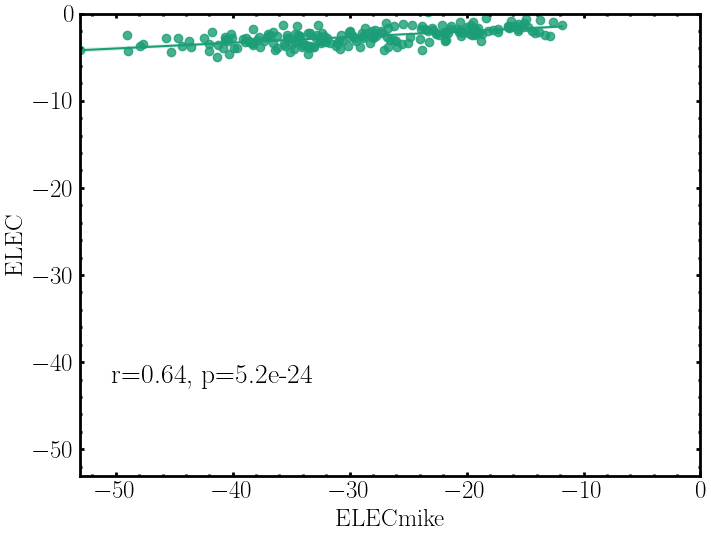

In [106]:
rp = sns.regplot(pc_joined, x="ELECmike", y="ELEC")
annotate(pc_joined)
plt.xlim(mikes_data["ELEC"].min(), 0)
plt.ylim(mikes_data["ELEC"].min(), 0)

(-53.0164323982342, 0.0)

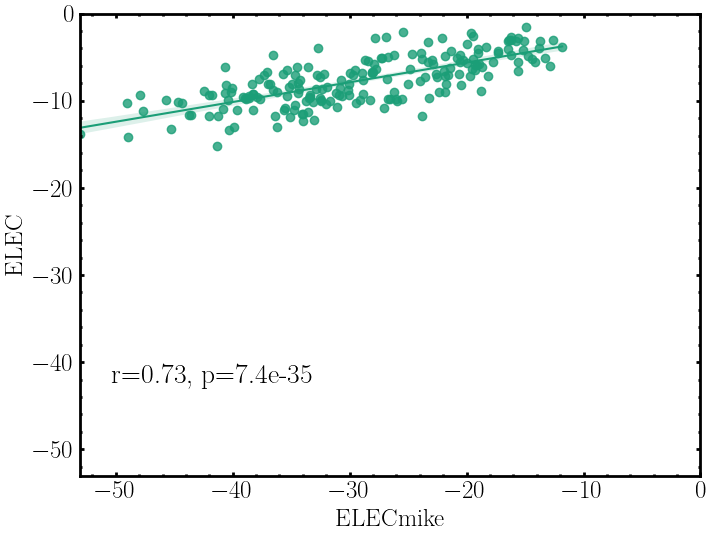

In [105]:
sns.regplot(mdcm_joined, x="ELECmike", y="ELEC")
annotate(mdcm_joined)
plt.xlim(mikes_data["ELEC"].min(), 0)
plt.ylim(mikes_data["ELEC"].min(), 0)